## APL  Report
### Samara Klar
### Chris Weber
### School of Government and Public Policy

Dynata/SSI collected these data. N=1,144 participants were contacted. Most respondents were contacted by email, a smaller sample was contacted by phone. The phone interviews did not come with gender and age -- these were imputed through a process known as multiple imputation through chained equations (MICE). We weight back to state population proportions, with respect to age, sex, ethnicity, income, and race. You can probably just ignore much of the code




In [17]:
require(dplyr)
require(survey)  
library(mice)
library(ggplot2)
rm=list=ls()

data<-read.csv("~/Desktop/APLData.csv")
dat<-data.frame(ID=seq(1:length(data[,1])))

### Create the labeled variable

clean_data<-dat %>% 
  mutate(time_az=recode(data$q1, `1`=1, `2`=2, `3`=3)) %>%
  mutate(interests=recode(data$q2, `1`=1, `2`=2, `3`=3, `4`=4, `5`=5 )) %>%
  mutate(interest_r=recode(data$q2, `1`="Similar", `2`="Similar", `3`="Neither", `4`="Different", `5`="Different" )) %>%
  mutate(identity_AZr=recode(data$q3, `1`=7, `2`=6, `3`=5, `4`=4, `5`=3, `6`=2 , `7`=1 )) %>%
  mutate(identity_AZ_r=recode(data$q3, `1`="Strong", `2`="Strong", `3`="Strong", `4`="Neutral", `5`="Weak", `6`="Weak" , `7`="Weak" )) %>%
  mutate(identity_USr=recode(data$q4, `1`=7, `2`=6, `3`=5, `4`=4, `5`=3, `6`=2 , `7`=1 )) %>%
  mutate(identity_US_r=recode(data$q4, `1`="Strong", `2`="Strong", `3`="Strong", `4`="Neutral", `5`="Weak", `6`="Weak" , `7`="Weak" )) %>%
  mutate(needs_metr=recode(data$q5, `1`=5, `2`=4, `3`=3, `4`=2, `5`=1 )) %>%
  mutate(needs_met_r=recode(data$q5, `1`="Better", `2`="Better", `3`="Same", `4`="Worse", `5`="Worse" )) %>%
  mutate(rep_ideo=recode(data$q6, `1`=1, `2`=2, `3`=3, `4`=4, `5`=5 )) %>%
  mutate(rep_ideo_r=recode(data$q6, `1`="Conservative", `2`="Conservative", `3`="Same", `4`="Liberal", `5`="Liberal" )) %>%
  mutate(rep_ideo_label=recode(data$q6, `1`="Much more Conservative", `2`="Slightly More Conservative", `3`="Same", `4`="Slightly More Liberal", `5`="Much More Liberal" )) %>%
  mutate(dem_ideo=recode(data$q7, `1`=1, `2`=2, `3`=3, `4`=4, `5`=5 )) %>%
  mutate(dem_ideo_r=recode(data$q7, `1`="Conservative", `2`="Conservative", `3`="Same", `4`="Liberal", `5`="Liberal" )) %>%
  mutate(dem_ideo_label=recode(data$q7, `1`="Much more Conservative", `2`="Slightly More Conservative", `3`="Same", `4`="Slightly More Liberal", `5`="Much More Liberal" )) %>%
  mutate(covid_affected=recode(data$q8, `1`=1, `2`=0, `2`=0)) %>%
  mutate(covid_affected_r=recode(data$q8, `1`="Yes", `2`="No", `2`="No")) %>%
  mutate(covid_finance=recode(data$q9, `1`=1, `2`=0, `2`=0)) %>%
  mutate(covid_finance_r=recode(data$q9, `1`="Yes", `2`="No", `2`="No")) %>%
  mutate(wear_maskr=recode(data$q10, `1`=5, `2`=4, `3`=3, `4`=2, `5`=1 )) %>%
  mutate(wear_mask_r=recode(data$q10, `1`="Often", `2`="Often", `3`="Half Time", `4`="Rarely", `5`="Rarely" )) %>%
  mutate(public_maskr=recode(data$q11, `1`=5, `2`=4, `3`=3, `4`=2, `5`=1 )) %>%
  mutate(public_mask_r=recode(data$q11, `1`="Yes", `2`="Yes", `3`="Not Sure", `4`="No", `5`="No" )) %>%
  mutate(k12r=recode(data$q12, `1`=5, `2`=4, `3`=3, `4`=2, `5`=1 )) %>%
  mutate(k12_r=recode(data$q12, `1`="Online", `2`="Online", `3`="Not Sure", `4`="In Person", `5`="In Person" )) %>%
  mutate(colleger=recode(data$q13, `1`=5, `2`=4, `3`=3, `4`=2, `5`=1 )) %>%
  mutate(college_r=recode(data$q13, `1`="Online", `2`="Online", `3`="Not Sure", `4`="In Person", `5`="In Person")) %>% 
  # Approval
  mutate(trump_covidr=recode(data$q14, `1`=5, `2`=4, `3`=3, `4`=2, `5`=1 )) %>%
  mutate(ducey_covidr=recode(data$q15, `1`=5, `2`=4, `3`=3, `4`=2, `5`=1 )) %>%
  mutate(mayor_covidr=recode(data$q16, `1`=5, `2`=4, `3`=3, `4`=2, `5`=1 )) %>%
  mutate(trump_covid_r=recode(data$q14, `1`="Approve", `2`="Approve", `3`="Not Sure", `4`="Disapprove", `5`="Disapprove" )) %>%
  mutate(ducey_covid=recode(data$q15,  `1`="Approve", `2`="Approve", `3`="Not Sure", `4`="Disapprove", `5`="Disapprove" )) %>%
  mutate(mayor_covid=recode(data$q16,  `1`="Approve", `2`="Approve", `3`="Not Sure", `4`="Disapprove", `5`="Disapprove" )) %>%
  # Policies, Conservative driection
  mutate(border_wallr=recode(data$q17, `1`=5, `2`=4, `3`=3, `4`=2, `5`=1 )) %>%
  mutate(border_wall_r=recode(data$q17,  `1`="Approve", `2`="Approve", `3`="Not Sure", `4`="Disapprove", `5`="Disapprove" )) %>%
  mutate(imm_citizenship=recode(data$q18, `1`=1, `2`=2, `3`=3, `4`=4, `5`=5 )) %>%
  mutate(imm_citizenship_r=recode(data$q18,  `1`="Support", `2`="Support", `3`="Not Sure", `4`="Oppose", `5`="Oppose" )) %>%
  mutate(imm_hurt_az=recode(data$q19, `1`=1, `2`=2, `3`=3, `4`=4, `5`=5 )) %>%
  mutate(imm_hurt_az_r=recode(data$q19, `1`="Help", `2`="Help", `3`="Neutral", `4`="Hurt", `5`="Hurt" )) %>%
  mutate(imm_hurt_culture=recode(data$q20, `1`=1, `2`=2, `3`=3, `4`=4, `5`=5 )) %>%
  mutate(imm_hurt_culture_r=recode(data$q20,  `1`="Help", `2`="Help", `3`="Neutral", `4`="Hurt", `5`="Hurt" )) %>%
  mutate(oppose_race_protests=recode(data$q21, `1`=1, `2`=2, `3`=3, `4`=4, `5`=5 )) %>%
  mutate(oppose_race_protests_r=recode(data$q21,  `1`="Approve", `2`="Approve", `3`="Not Sure", `4`="Disapprove", `5`="Disapprove" )) %>%
  # Policies, More contact and positive with police
  mutate(interact_lawr=recode(data$q22, `1`=5, `2`=4, `3`=3, `4`=2, `5`=1 )) %>%
  mutate(positive_lawr=recode(data$q23, `1`=5, `2`=4, `3`=3, `4`=2, `5`=1 )) %>%
  mutate(positive_law_r=recode(data$q23, `1`="Positive", `2`="Positive", `3`="Mix", `4`="Negative", `5`="Negative" )) %>%
  # Pol Participation  
  mutate(registered=recode(data$q24, `1`=1, `2`=0, `3`=0)) %>%
  mutate(plan_to_vote_presr=recode(data$q25, `1`=5, `2`=4, `3`=3, `4`=2, `5`=1 )) %>%
  mutate(vote_preference_pres=recode(data$q26, `1`=1, `2`=2, `3`=3, `4`=4, `5`=5 )) %>%
  mutate(biden_v_trump_r=recode(data$q26, `1`="Biden(D)", `2`="Biden(D)",`4`="Trump(R)", `5`="Trump(R)" )) %>%
  mutate(trump_vote=recode(data$q26, `1`=0, `2`=0,`4`=1, `5`=1 )) %>%
  mutate(plan_to_vote_senate=recode(data$q27, `1`=5, `2`=4, `3`=3, `4`=2, `5`=1 )) %>%
  mutate(vote_preference_sen=recode(data$q28, `1`=1, `2`=2, `3`=3, `4`=4, `5`=5 )) %>%
  mutate(mcsally_v_kelly=recode(data$q28, `1`="Kelly(D)", `2`="Kelly(D)",`4`="McSally(R)", `5`="McSally(R)" )) %>%
  mutate(mcsally_vote=recode(data$q26, `1`=0, `2`=0,`4`=1, `5`=1 )) %>%
  ## Partisanship
  mutate(pid=recode(data$q29, `1`=1, `2`=2, `3`=3, `4`=4, `5`=5 , `6`=6 , `7`=7 )) %>%
  mutate(pid3=recode(data$q29, `1`="Democrat", `2`="Democrat", `3`="Democrat", `4`="Independent", `5`="Republican" , `6`="Republican" , `7`="Republican" )) %>%
  mutate(pid5=recode(data$q29, `1`="Democrat", `2`="Democrat", `3`="Independent (Lean D)", `4`="Independent", `5`="Independent (Lean R)" , `6`="Republican" , `7`="Republican" )) %>%
  ## Feeling therms
  mutate(rep_ft=data$q30) %>%
  mutate(dem_ft=data$q31) %>%
  mutate(rep_ft_people=data$q32) %>%
  mutate(dem_ft_people=data$q33) %>%
  mutate(ideo=recode(data$q34, `1`=1, `2`=2, `3`=3, `4`=4, `5`=5)) %>%
  mutate(ideo_r=recode(data$q29, `1`="Liberal", `2`="Liberal", `3`="Moderate", `4`="Conservative", `5`="Conservative" )) %>%
  mutate(ideo_label=factor(recode(data$q29, `1`="Liberal", `2`="Slightly Liberal", `3`="Moderate", `4`="Slightly Conservative", `5`="Conservative" ))) %>%
    ##Dems
  mutate(hispanic=recode(data$q35, `1`=1, `2`=0)) %>%
  mutate(race=recode(data$q36, `1`=1, `2`=2, `3`=3, `4`=4, `5`=5)) %>%
  mutate(christian=recode(data$q37, `1`=1, `2`=1, `3`=0, `4`=0, `5`=0)) %>%
  mutate(income=recode(data$q38, `1`=1, `2`=2, `3`=3, `4`=4)) %>%
  mutate(children=recode(data$q39, `1`=1, `2`=0)) %>%
  mutate(age=recode(data$age, `1`=1, `2`=2, `3`=3, `4`=4)) %>%
  mutate(sex=recode(data$gender, `1`=1, `2`=2))  %>% suppressWarnings()

tempData <- mice(clean_data,m=1,maxit=50,meth='pmm',seed=500, printFlag=TRUE)
clean_data<-complete(tempData,1)



### Weight on Income
library(survey)
model<-suppressWarnings(svydesign(ids=~1, data=clean_data))
hispanic_dist<-data.frame(hispanic=c(0, 1),
                          Freq=nrow(clean_data)*c(0.69,0.31))
race_dist<-data.frame(race=c(1,2,3,4,5),
                      Freq=nrow(clean_data)*c(0.77, 0.04, 0.03, 0.04, 0.12))
age_dist<-data.frame(age=c(1,2,3,4),
                     Freq=nrow(clean_data)*c(0.32, 0.30, 0.15, 0.23))
sex_dist<-data.frame(sex=c(1,2),
                     Freq=nrow(clean_data)*c(0.50, 0.5))
income_dist<-data.frame(income=c(1,2,3,4),
                        Freq=nrow(clean_data)*c(0.45, 0.31, 0.14, 0.10))


raked_data<-rake(design=model,
                 sample.margins=list(~hispanic, ~race, ~sex, ~age, ~income),
                 population.margins=list(hispanic_dist, race_dist, sex_dist, age_dist, income_dist))


### Univariate Plots ####
uni_dist<-function(var, design, title,
                   xlabel="Test", upper=0.5){
  f<-as.formula(paste0("~", var))
  tab_w<-svytable(f, design) %>%
    as.data.frame() %>%
    mutate(Proportion=Freq/sum(Freq)) %>%
    arrange(desc(Proportion))
    return(tab_w)
}

uni_plot<-function(tab_w, title, upper){
  plot<-ggplot(data=tab_w, mapping=aes(x=tab_w[,1], y=Proportion)) +
    geom_col()+
    coord_flip()+
    theme_bw() +
    theme(axis.ticks=element_blank())+
    ggtitle(title)+
    scale_y_continuous("Proportion", limits=c(0,upper))+
    scale_x_discrete("Belief")+
    labs(caption="Arizona Policy Lab Election and Policy Survey")
  return(plot)
}


  ## Take this function apart
bi_plot<-function(var1, var2, design, title="This",
                   xlabel="That", ylabel="And", upper=0.5){
  f<-as.formula(paste0("~", var1,"+", var2))
  tab_w<-svytable(f, design) %>%
    as.data.frame() %>% group_by(pid3) %>%
    mutate(total=sum(Freq)) %>%
    ungroup() %>%
   mutate(Proportion=Freq/total) 
  names(tab_w)<-c("y", "group", "frequency", "total", "Proportion")
  return(tab_w)
}

plot.fun<-function(title, upper, xlabels=c("Liberal", "Lean Liberal", "Moderate", "Lean Conservative", "Conservative")) { 
  plot <- ggplot(tab_w, aes(x = as.factor(y), y = Proportion, fill=as.factor(y))) + 
    facet_wrap(~group, ncol=3) + 
    geom_bar(width = 1, stat = "identity") + 
    scale_fill_grey() +
    theme_bw() + 
    theme(legend.position="none", axis.ticks = element_blank(), axis.text.x = element_text(angle = 90)) + 
    ggtitle(title) +
    labs(caption="Arizona Policy Lab Election and Policy Survey")+
    scale_y_continuous("Proportion", limits = c(0, upper)) + 
    scale_x_discrete("Response", labels=xlabels)
  return(plot)
}






Warning message:
“Unreplaced values treated as NA as .x is not compatible. Please specify replacements exhaustively or supply .default”Warning message:
“Unreplaced values treated as NA as .x is not compatible. Please specify replacements exhaustively or supply .default”Warning message:
“Unreplaced values treated as NA as .x is not compatible. Please specify replacements exhaustively or supply .default”Warning message:
“Unreplaced values treated as NA as .x is not compatible. Please specify replacements exhaustively or supply .default”Warning message:
“Unreplaced values treated as NA as .x is not compatible. Please specify replacements exhaustively or supply .default”Warning message:
“Unreplaced values treated as NA as .x is not compatible. Please specify replacements exhaustively or supply .default”Warning message:
“Unreplaced values treated as NA as .x is not compatible. Please specify replacements exhaustively or supply .default”Warning message:
“Unreplaced values treated as NA as .x


 iter imp variable
  1   1  covid_affected  covid_finance  vote_preference_pres  trump_vote  vote_preference_sen  ideo_label  christian  age  sex
  2   1  covid_affected  covid_finance  vote_preference_pres  trump_vote  vote_preference_sen  ideo_label  christian  age  sex
  3   1  covid_affected  covid_finance  vote_preference_pres  trump_vote  vote_preference_sen  ideo_label  christian  age  sex
  4   1  covid_affected  covid_finance  vote_preference_pres  trump_vote  vote_preference_sen  ideo_label  christian  age  sex
  5   1  covid_affected  covid_finance  vote_preference_pres  trump_vote  vote_preference_sen  ideo_label  christian  age  sex
  6   1  covid_affected  covid_finance  vote_preference_pres  trump_vote  vote_preference_sen  ideo_label  christian  age  sex
  7   1  covid_affected  covid_finance  vote_preference_pres  trump_vote  vote_preference_sen  ideo_label  christian  age  sex
  8   1  covid_affected  covid_finance  vote_preference_pres  trump_vote  vote_preference_s

Warning message:
“Number of logged events: 29”

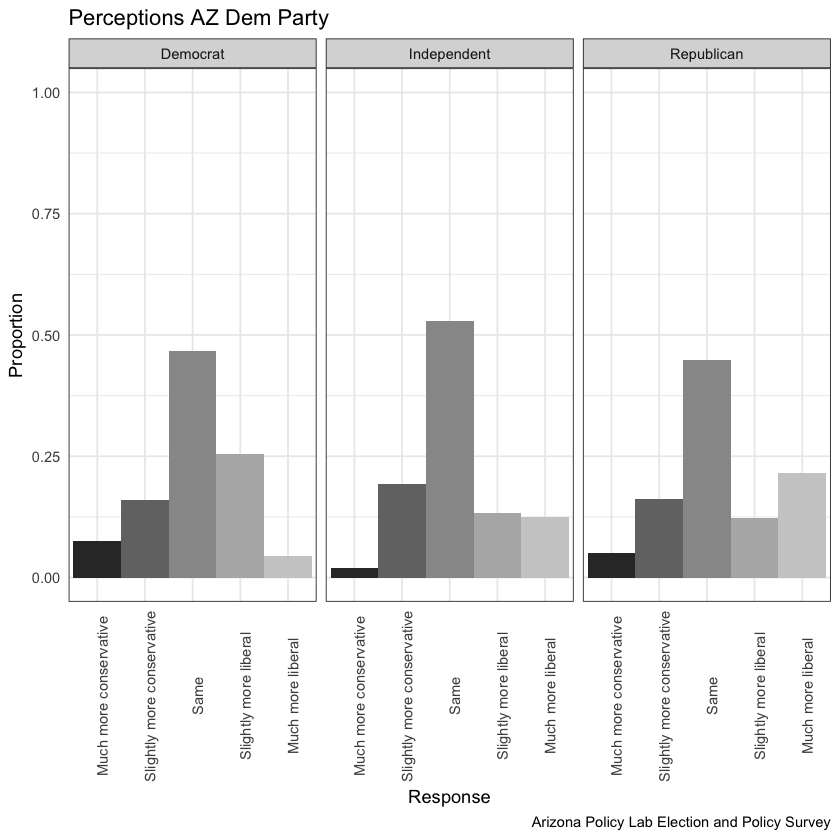

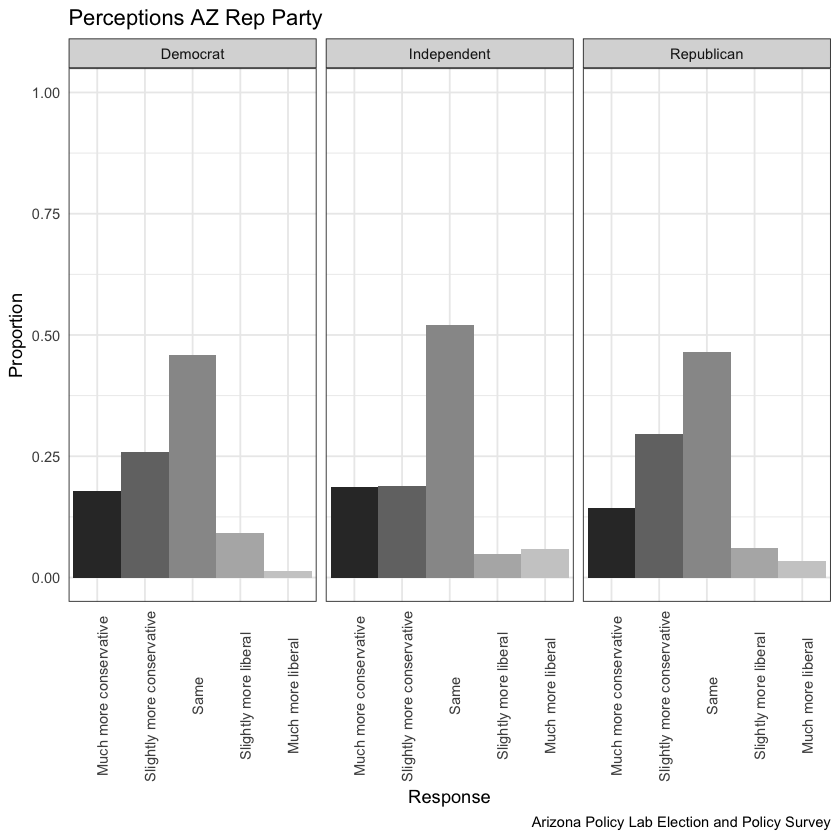

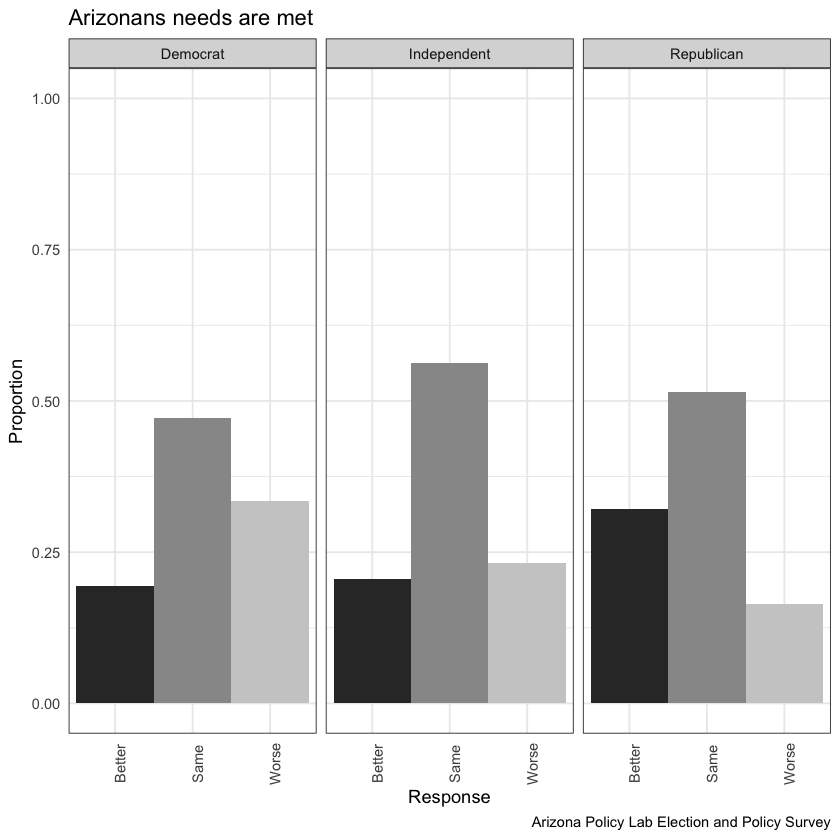

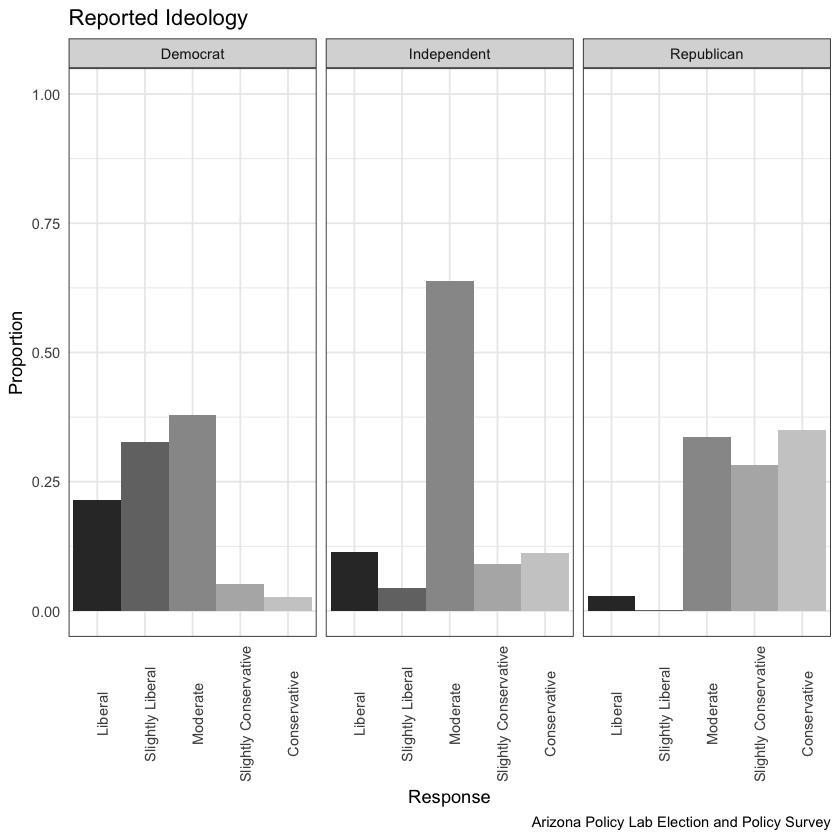

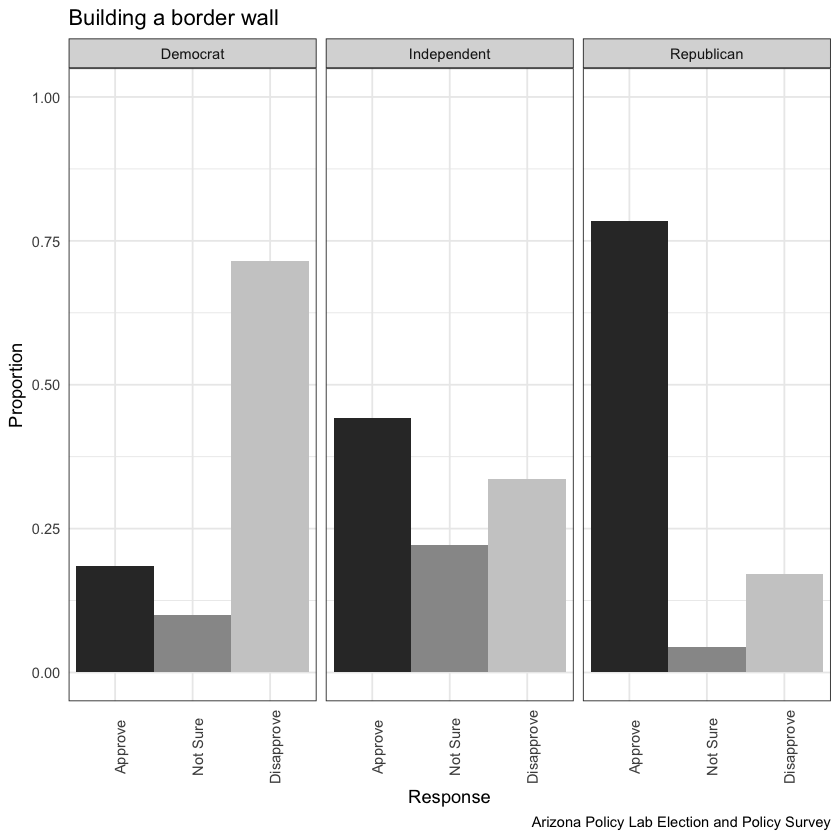

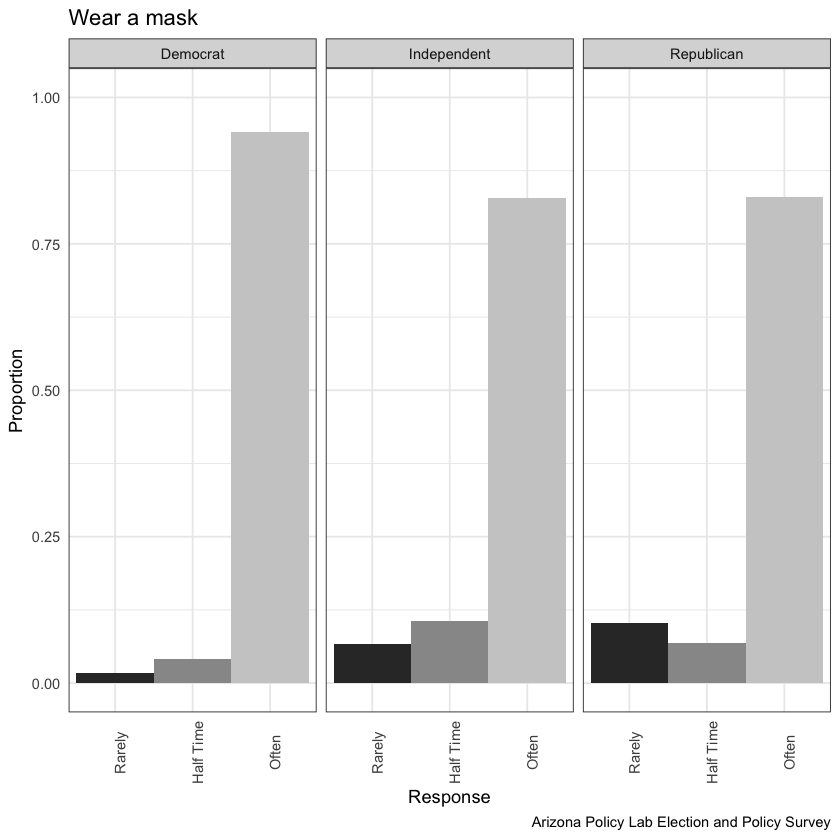

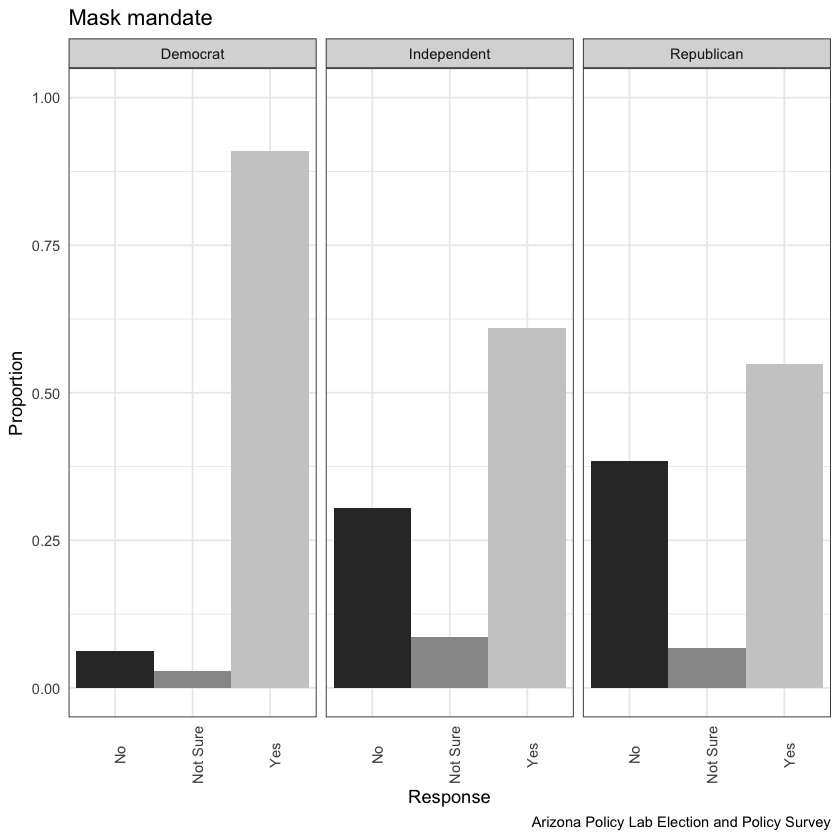

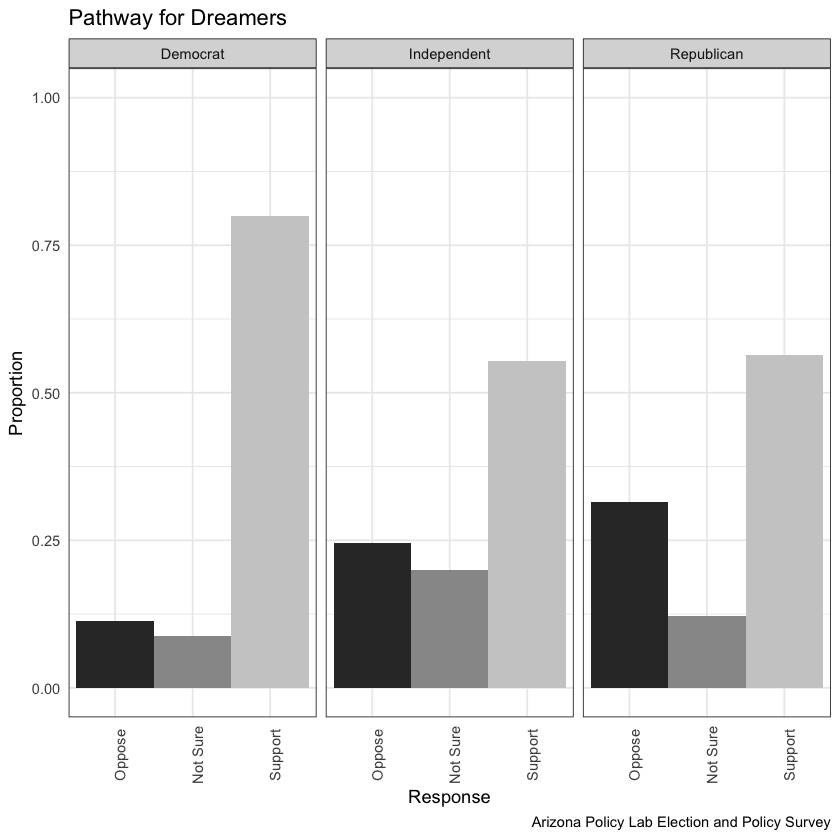

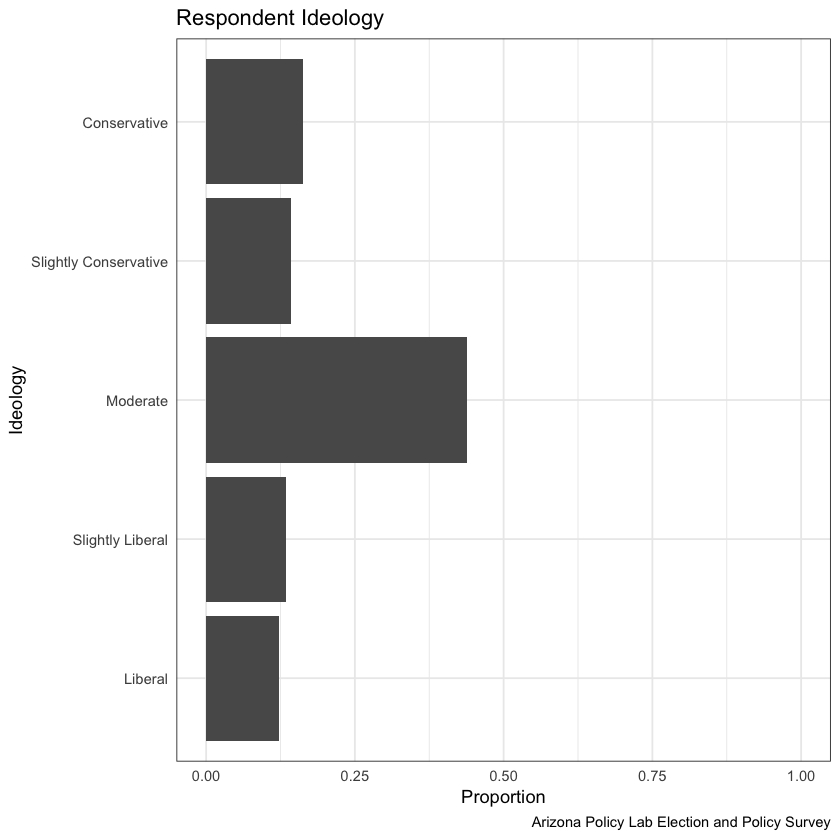

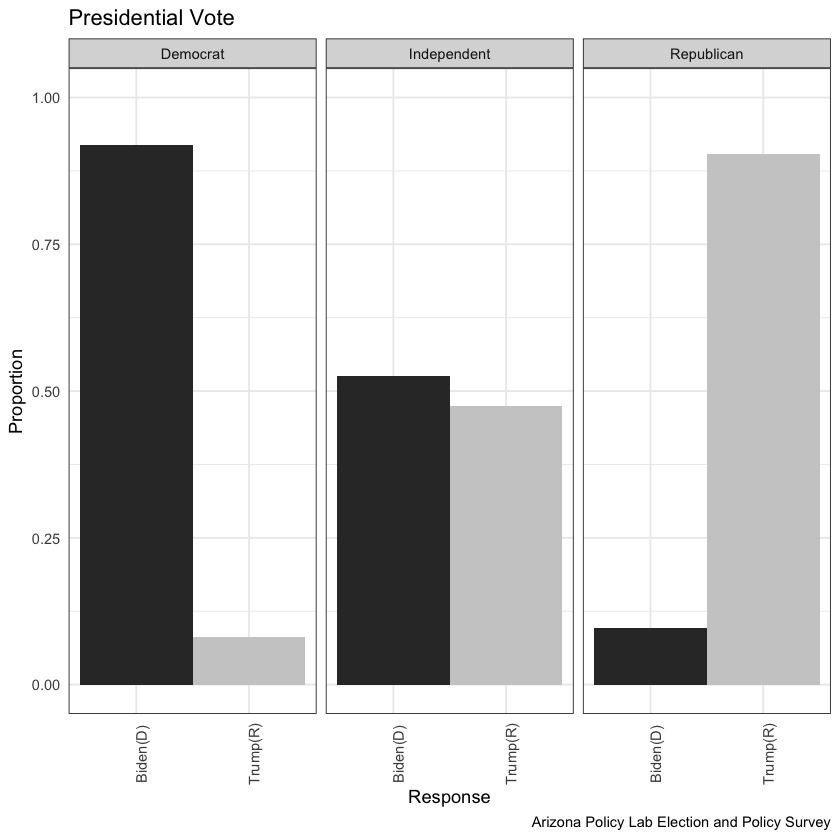

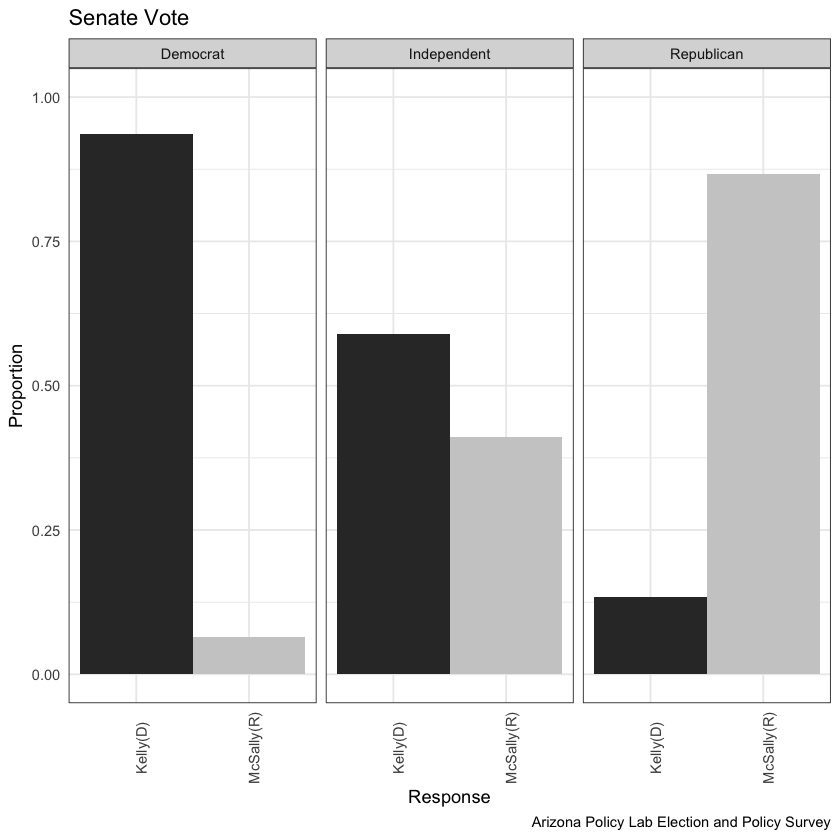

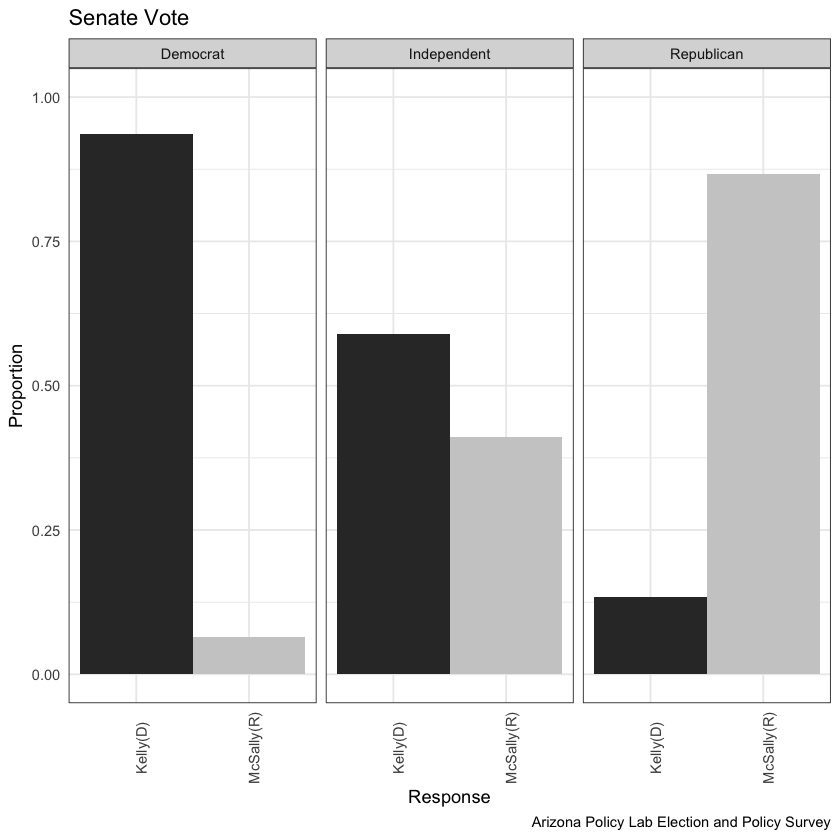

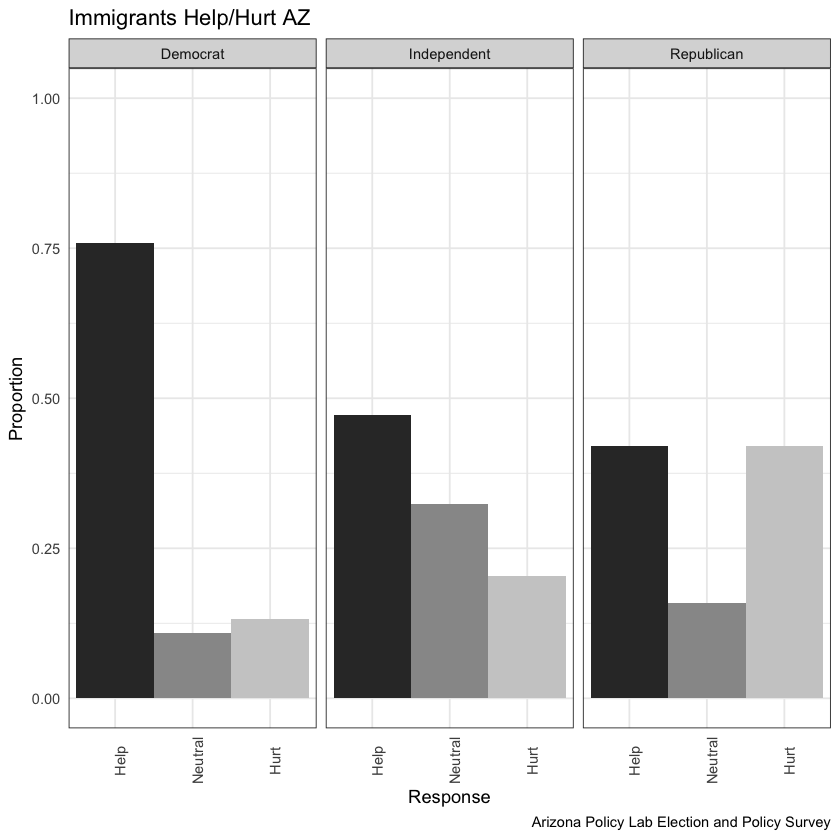

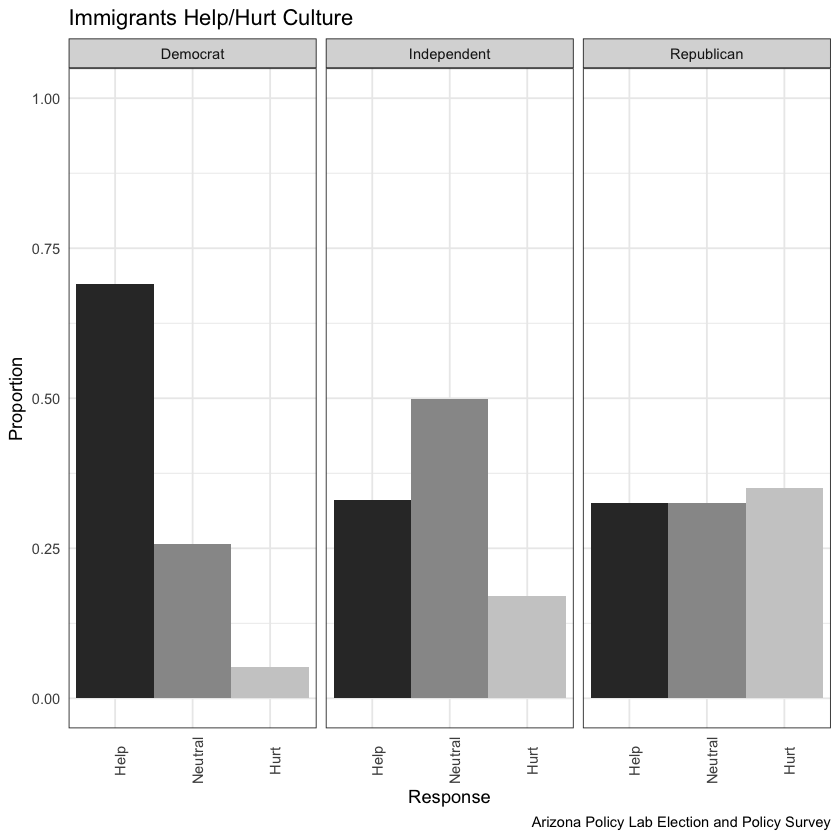

In [11]:

tab_w<-bi_plot("dem_ideo", "pid3", raked_data)
write.csv(tab_w, file="dem perceptions.csv")
plot.fun("Perceptions AZ Dem Party",1 , xlabels=c("Much more conservative", "Slightly more conservative", "Same", "Slightly more liberal", "Much more liberal"))


tab_w<-bi_plot("rep_ideo", "pid3", raked_data)
write.csv(tab_w, file="rep perceptions.csv")
plot.fun("Perceptions AZ Rep Party",1 , xlabels=c("Much more conservative", "Slightly more conservative", "Same", "Slightly more liberal", "Much more liberal"))



tab_w<-bi_plot("needs_met_r", "pid3", raked_data )
write.csv(tab_w, file="needs med.csv")
plot.fun("Arizonans needs are met",1 , xlabels=c("Better", "Same",  "Worse"))


tab_w<-bi_plot("ideo", "pid3", raked_data )
write.csv(tab_w, file="ideoparty.csv")
plot.fun("Reported Ideology",1 , xlabels=c("Liberal", "Slightly Liberal",  "Moderate",
                                                 "Slightly Conservative", "Conservative"))


bi_plot_issue<-function(var1, var2, design, title="This",
                  xlabel="That", ylabel="And", upper=0.5){
  f<-as.formula(paste0("~", var1,"+", var2))
  tab_w<-svytable(f, design) %>%
    as.data.frame() %>% group_by(pid3) %>%
    mutate(total=sum(Freq)) %>%
    ungroup() %>%
    mutate(Proportion=Freq/total) 
  
  
  names(tab_w)<-c("y", "group", "frequency", "total", "Proportion")
  return(tab_w)
}

plot.fun_issue<-function(title, upper ) { 
  plot <- ggplot(tab_w, aes(x = as.factor(y), y = Proportion, fill=as.factor(y))) + 
    facet_wrap(~group, ncol=3) + 
    geom_bar(width = 1, stat = "identity") + 
    scale_fill_grey() +
    theme_bw() + 
    theme(legend.position="none", axis.ticks = element_blank(), axis.text.x = element_text(angle = 90)) + 
    ggtitle(title) +
    labs(caption="Arizona Policy Lab Election and Policy Survey")+
    scale_y_continuous("Proportion", limits = c(0, upper)) + 
    scale_x_discrete("Response")
  return(plot)
}


tab_w<-bi_plot_issue("border_wall_r", "pid3", raked_data )
write.csv(tab_w, file="border wall.csv")
tab_w$y<-factor(tab_w$y, c("Approve", "Not Sure", "Disapprove"))
plot.fun_issue("Building a border wall",1 )



tab_w<-bi_plot_issue("wear_mask_r", "pid3", raked_data )
tab_w$y<-factor(tab_w$y, c("Rarely", "Half Time", "Often"))
write.csv(tab_w, file="wear mask.csv")
plot.fun_issue("Wear a mask",1 )


tab_w<-bi_plot_issue("public_mask_r", "pid3", raked_data )
tab_w$y<-factor(tab_w$y, c("No", "Not Sure", "Yes"))
write.csv(tab_w, file="public mask.csv")
plot.fun_issue("Mask mandate",1 )


tab_w<-bi_plot_issue("imm_citizenship_r", "pid3", raked_data )
tab_w$y<-factor(tab_w$y, c("Oppose", "Not Sure", "Support"))
write.csv(tab_w, file="pathway.csv")
plot.fun_issue("Pathway for Dreamers",1 )


uni_plot<-function(tab_w, title, upper){
  plot<-ggplot(data=tab_w, mapping=aes(x=tab_w[,1], y=Proportion)) +
    geom_col()+
    coord_flip()+
    theme_bw() +
    theme(axis.ticks=element_blank())+
    ggtitle(title)+
    scale_y_continuous("Proportion", limits=c(0,upper))+
    scale_x_discrete("Ideology", labels=c("Liberal", "Slightly Liberal", "Moderate", 
                                         "Slightly Conservative", "Conservative"))+
    labs(caption="Arizona Policy Lab Election and Policy Survey")
  return(plot)
}

tab_w<-uni_dist("ideo", raked_data, title="Ideology", xlabel="Response", upper=1)
write.csv(tab_w, file="ideology.csv")
uni_plot(tab_w, title="Respondent Ideology", upper=1)


### Vote Predictions ####
tab_w<-uni_dist("biden_v_trump_r", raked_data, title="Ideology", xlabel="Response", upper=1)

tab_w<-uni_dist("mcsally_v_kelly", raked_data, title="Ideology", xlabel="Response", upper=1)

tab_w<-bi_plot_issue("biden_v_trump_r", "pid3", raked_data )
write.csv(tab_w, file="vote_by_party.csv")
plot.fun_issue("Presidential Vote",1 )


tab_w<-bi_plot_issue("mcsally_v_kelly", "pid3", raked_data )
write.csv(tab_w, file="vote_by_party2.csv")
plot.fun_issue("Senate Vote",1 )


tab_w<-bi_plot_issue("mcsally_v_kelly", "pid3", raked_data )
write.csv(tab_w, file="vote_by_party2.csv")
plot.fun_issue("Senate Vote",1 )



tab_w<-bi_plot_issue("imm_hurt_az_r", "pid3", raked_data )
tab_w$y<-factor(tab_w$y, c("Help", "Neutral", "Hurt"))
write.csv(tab_w, file="vimm_hurt_az.csv")
plot.fun_issue("Immigrants Help/Hurt AZ",1 )


tab_w<-bi_plot_issue("imm_hurt_culture_r", "pid3", raked_data )
tab_w$y<-factor(tab_w$y, c("Help", "Neutral", "Hurt"))
write.csv(tab_w, file="vimm_hurt_az_cultre.csv")
plot.fun_issue("Immigrants Help/Hurt Culture",1 )